In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
Train = pd.read_csv('Train.csv')
Xtest = pd.read_csv('Test.csv')

In [3]:
print(Train.shape ,Xtest.shape)

(1600, 6) (400, 5)


In [4]:
Train.head(n=3)

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371


In [5]:
X_train = Train.iloc[: , :5]
Y_train = Train.iloc[: , 5]

In [6]:
Y_train

0       -82.154667
1       -48.897960
2        77.270371
3        -2.988581
4       -37.596722
           ...    
1595    -80.110012
1596    118.315601
1597   -107.510508
1598    -47.341558
1599   -115.939003
Name: target, Length: 1600, dtype: float64

In [7]:
print(X_train.shape, Y_train.shape)

(1600, 5) (1600,)


In [8]:
X = np.array(X_train)
y = np.array(Y_train)
print(X_train.shape, Y_train.shape)

(1600, 5) (1600,)


In [9]:
print(X,y) 

[[ 0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [-0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 ...
 [ 1.04417694 -0.89920649  1.73039905 -1.87105676  0.44251965]
 [-1.2691729  -0.00505216  1.85766873 -1.08036482  0.73633394]
 [-1.88400025 -0.84942743 -1.45227035  0.48861308  1.4595758 ]] [ -82.15466656  -48.89796018   77.2703707  ... -107.51050797  -47.34155781
 -115.93900296]


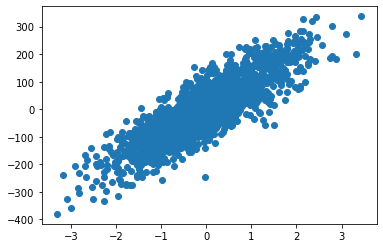

In [10]:
plt.scatter(X[: , 1] , y)
plt.show()

In [11]:
X_train.describe()


,feature_1,feature_2,feature_3,feature_4,feature_5
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005
std,0.997338,1.021776,1.011768,1.017189,0.978654
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527
75%,0.682118,0.645442,0.639130,0.646290,0.650089
max,3.287205,3.438895,3.216176,2.985410,3.321770


In [12]:
u = np.mean(X,axis=0)
std = np.mean(X,axis=0)

In [13]:
print(u,std)

[ 0.0041143  -0.0276038  -0.04445943 -0.04240792  0.01200535] [ 0.0041143  -0.0276038  -0.04445943 -0.04240792  0.01200535]


In [14]:
X = X-u/std

In [15]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X,X.shape)

[[ 1.         -0.70658376 -1.94559871 -1.42110515 -0.59318398 -0.47433817]
 [ 1.         -1.83608408 -1.18922804 -1.77640262 -2.05383124 -0.40200315]
 [ 1.         -0.76357489 -0.86716398 -1.14772298 -0.30014604 -1.18736416]
 ...
 [ 1.          0.04417694 -1.89920649  0.73039905 -2.87105676 -0.55748035]
 [ 1.         -2.2691729  -1.00505216  0.85766873 -2.08036482 -0.26366606]
 [ 1.         -2.88400025 -1.84942743 -2.45227035 -0.51138692  0.4595758 ]] (1600, 6)


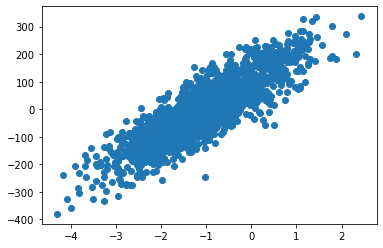

In [16]:
plt.scatter(X[: , 2] , y)
plt.show()

In [17]:
temp = np.zeros((10,1))
temp1 = np.zeros((10,))

In [18]:
print(temp,temp1)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
temp1[0]

0.0

In [20]:
def hypothesis(x,theta):
    n = x.shape[0]
    y_ = 0.0
    for i in range(n):
        y_ += (theta[i]*x[i])
    return y_

def error(X,y,theta):
    total_error = 0.0
    m= X.shape[0]
    
    for i in range(m):
        y_  = hypothesis(X[i],theta)
        total_error += (y_ - y[i])**2
    
    return total_error/m

def gradient(X,y,theta):
    m,n = X.shape
    grad = np.zeros((n,))
    
    for j in range(n):
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
            
    return grad/m

def gradient_descent(X,y,lr=0.1,max_iters=300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        grad = gradient(X,y,theta)
        
        for j in range(n):
            theta[j] = theta[j] - lr*grad[j]
            
    return theta,error_list        
    

In [21]:
import time
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("successfully executed in ",end-start)

successfully executed in  35.62500190734863


In [22]:
print(theta)

[179.65378106  29.14832552  92.14595153   7.68774972  44.22613457
   1.94404096]


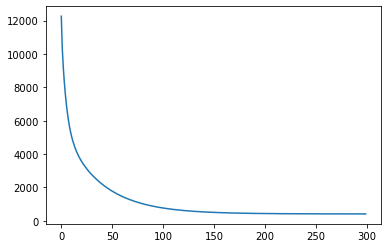

In [23]:
plt.plot(error_list)
plt.show()

In [24]:
y_  = []

for i in range(X.shape[0]):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
    
y_ = np.array(y_)
y_.shape

(1600,)

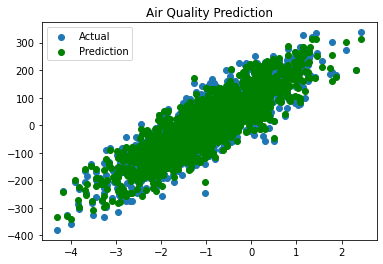

In [25]:
plt.scatter(X[: ,2],y , label='Actual')
plt.scatter(X[:,2],y_,c='g',label='Prediction')
plt.title('Air Quality Prediction')
plt.legend()
plt.show()

In [26]:
X_test = np.array(Xtest)

y_test  = []

for i in range(X_test.shape[0]):
    pred = hypothesis(X_test[i],theta)
    y_test.append(pred)
    
y_test = np.array(y_test)
y_test.shape

(400,)

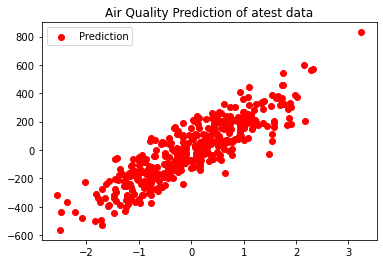

In [27]:
plt.scatter(X_test[:,0],y_test,c='red',label='Prediction')
plt.title('Air Quality Prediction of atest data')
plt.legend()
plt.show()

In [28]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denum = np.sum((y - y.mean())**2)
    score = 1 - num/denum
    
    print(score*100)

In [29]:
r2_score(y,y_)

96.59619971213533


In [30]:
y_test = pd.DataFrame(y_test,columns=['target'])

In [31]:
id = np.arange((400))
y_test.insert(loc=0,column= 'Id',value=id)

In [32]:
y_test

,Id,target
0,0,156.407831
1,1,7.852768
2,2,-187.744557
3,3,-438.821801
4,4,45.783569
...,...,...
395,395,-198.327405
396,396,-51.330655
397,397,74.358032
398,398,-242.525212


In [33]:
y_test.to_csv('Test_Prediction.csv',index=False)